<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/MINISTKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = datasets.load_digits()

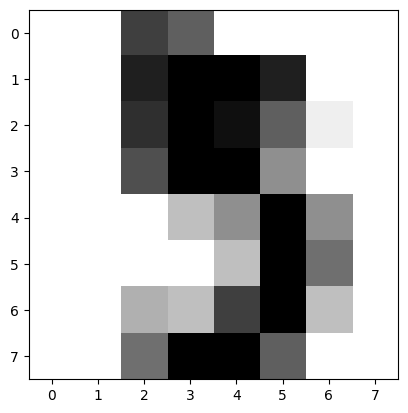

In [3]:
plt.subplot()
plt.imshow(data.images[5], cmap=plt.cm.gray_r)

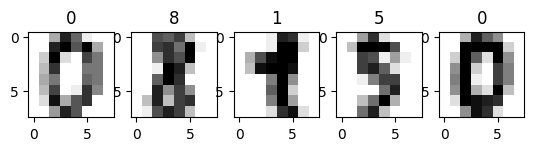

In [4]:
for i in range(5):
    plt.subplot(1,5, i+1)
    plt.imshow(data.images[i*40], cmap=plt.cm.gray_r)
    plt.title(data.target[i*40])

In [5]:
data.images.shape

(1797, 8, 8)

In [6]:
X = data.images.reshape((len(data.images), -1))

In [7]:
X.shape

(1797, 64)

In [8]:
y = data.target

In [9]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
Train_mount=int(len(data.images)*.76)
Train_mount

1365

In [23]:
X_train=X[:Train_mount]
y_train=y[:Train_mount]
X_test=X[Train_mount:]
y_test=y[Train_mount:]

In [24]:
knn_model = KNeighborsClassifier()


In [25]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_predicted = knn_model.predict(X_test)

In [27]:
from sklearn import metrics

In [28]:

print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.96      1.00      0.98        45
           2       0.98      1.00      0.99        41
           3       0.97      0.89      0.93        44
           4       0.98      0.96      0.97        46
           5       0.93      1.00      0.97        43
           6       1.00      1.00      1.00        44
           7       0.94      1.00      0.97        44
           8       0.93      0.93      0.93        40
           9       1.00      0.93      0.96        43

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



In [29]:
print(metrics.confusion_matrix(y_test, knn_model.predict(X_test)))

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  1  0  1  2  0]
 [ 0  0  0  0 44  0  0  1  1  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  2  0  0  0  0  0  1 37  0]
 [ 0  0  0  1  0  2  0  0  0 40]]


In [18]:
knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train, y_train)
y_prdeicted = knn_model2.predict(X_test)
print(metrics.classification_report(y_test, y_prdeicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.98      0.99      0.98        80
           2       0.97      0.95      0.96        77
           3       0.92      0.92      0.92        79
           4       0.99      0.94      0.96        83
           5       0.95      0.99      0.97        82
           6       0.99      1.00      0.99        80
           7       0.98      1.00      0.99        80
           8       0.95      0.96      0.95        76
           9       0.94      0.91      0.92        81

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



In [19]:
knn_model3 = KNeighborsClassifier(n_neighbors=8)
knn_model3.fit(X_train, y_train)
y_prdeicted3 = knn_model3.predict(X_test)
print(metrics.classification_report(y_test, y_prdeicted3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       0.94      0.99      0.96        80
           2       0.97      0.92      0.95        77
           3       0.91      0.92      0.92        79
           4       1.00      0.94      0.97        83
           5       0.94      0.99      0.96        82
           6       0.99      1.00      0.99        80
           7       0.94      1.00      0.97        80
           8       0.96      0.88      0.92        76
           9       0.93      0.91      0.92        81

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



In [30]:
corrected_val_list=list()
for i in range(1,100):
  prc=i/100
  # print (prc)
  Train_mount=int(len(data.images)*prc)
  Test_mount=len(data.images)-Train_mount
  KNN_new = KNeighborsClassifier()
  KNN_new.fit(X[:Train_mount], y[:Train_mount])
  pridcted_image=KNN_new.predict(X[Train_mount:])
  Real_image=y[Train_mount:]
  correct_val=0
  for j in range(Test_mount):
    if pridcted_image[j]==Real_image[j]:
      correct_val+=1
  corrected_val_list.append((correct_val/Test_mount)*100)


In [31]:
print(corrected_val_list)

[37.640449438202246, 69.86379114642452, 71.90366972477065, 74.68134414831982, 79.21545667447307, 81.83431952662723, 82.29665071770334, 82.34582829504232, 83.80195599022005, 83.62175525339926, 84.0625, 83.75474083438685, 84.14322250639387, 83.18240620957309, 85.40575916230367, 87.28476821192052, 88.6058981233244, 88.80597014925374, 89.76648351648352, 90.40333796940195, 90.70422535211267, 90.65620542082739, 90.7514450867052, 91.28843338213763, 91.83976261127597, 91.50375939849624, 91.46341463414635, 91.49922720247295, 92.0846394984326, 93.79968203497614, 94.11290322580645, 94.27168576104746, 94.18604651162791, 94.10278011794439, 94.1830624465355, 94.17897480451781, 95.32215357458075, 95.33632286995515, 95.44211485870557, 95.3660797034291, 95.19321394910462, 95.39789069990412, 95.21951219512195, 95.13406156901688, 95.34883720930233, 95.36560247167868, 95.27806925498426, 95.18716577540107, 95.31079607415485, 95.55061179087876, 95.68671963677639, 95.71263035921204, 95.85798816568047, 95.767

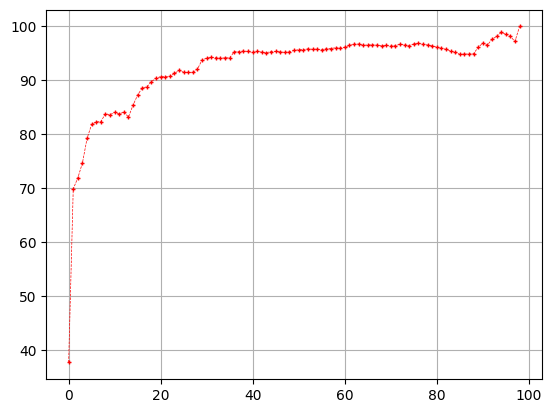

In [33]:
plt.plot(corrected_val_list, color='red', marker='+', linestyle='dashed',linewidth=.5, markersize=3)
plt.grid()


In [34]:
from sklearn.svm import SVC
corrected_val_list_svc=list()
for i in range(1,100):
  prc=i/100
  # print (prc)
  Train_mount=int(len(data.images)*prc)
  Test_mount=len(data.images)-Train_mount
  svm_new = SVC()
  svm_new.fit(X[:Train_mount], y[:Train_mount])
  pridcted_image=svm_new.predict(X[Train_mount:])
  Real_image=y[Train_mount:]
  correct_val=0
  for j in range(Test_mount):
    if pridcted_image[j]==Real_image[j]:
      correct_val+=1
  corrected_val_list_svc.append((correct_val/Test_mount)*100)



In [35]:
print(corrected_val_list_svc)

[37.640449438202246, 69.86379114642452, 71.90366972477065, 74.68134414831982, 79.21545667447307, 81.83431952662723, 82.29665071770334, 82.34582829504232, 83.80195599022005, 83.62175525339926, 84.0625, 83.75474083438685, 84.14322250639387, 83.18240620957309, 85.40575916230367, 87.28476821192052, 88.6058981233244, 88.80597014925374, 89.76648351648352, 90.40333796940195, 90.70422535211267, 90.65620542082739, 90.7514450867052, 91.28843338213763, 91.83976261127597, 91.50375939849624, 91.46341463414635, 91.49922720247295, 92.0846394984326, 93.79968203497614, 94.11290322580645, 94.27168576104746, 94.18604651162791, 94.10278011794439, 94.1830624465355, 94.17897480451781, 95.32215357458075, 95.33632286995515, 95.44211485870557, 95.3660797034291, 95.19321394910462, 95.39789069990412, 95.21951219512195, 95.13406156901688, 95.34883720930233, 95.36560247167868, 95.27806925498426, 95.18716577540107, 95.31079607415485, 95.55061179087876, 95.68671963677639, 95.71263035921204, 95.85798816568047, 95.767

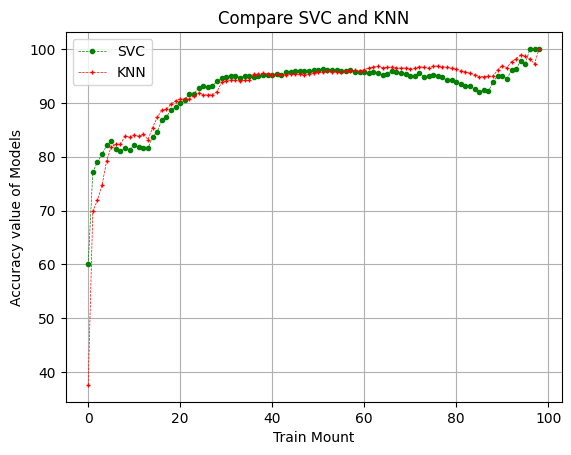

In [38]:
plt.plot(corrected_val_list_svc, color='green', marker='o', linestyle='dashed',linewidth=.5, markersize=3, label='SVC')
plt.plot(corrected_val_list, color='red', marker='+', linestyle='dashed',linewidth=.5, markersize=3, label='KNN')
plt.xlabel("Train Mount")
plt.ylabel("Accuracy value of Models")
plt.title("Compare SVC and KNN")
plt.grid()
plt.legend()
plt.show()
